# 1. Préparation des données pour la modélisation

## 1.1 Séparation Train / Test

In [38]:
# ================================
# SÉPARATION DES DONNÉES: TRAIN / TEST
# ================================
import pandas as pd
from sklearn.model_selection import train_test_split
print("="*100)
print("SÉPARATION DES DONNÉES: TRAIN / TEST")
print("="*100)

df_final= pd.read_csv("../data/dataset_final_processed.csv")

# Séparer les features (X) et la cible (y)
X = df_final.drop('grave', axis=1)
y = df_final['grave']

print(f"\nDataset complet:")
print(f"  • Features (X): {X.shape[0]:,} observations × {X.shape[1]} variables")
print(f"  • Cible (y):    {y.shape[0]:,} observations")

# Distribution de la cible dans le dataset complet
print(f"\nDistribution de la variable cible (dataset complet):")
print(y.value_counts().to_frame('Count').assign(Pourcentage=lambda df: (df['Count']/len(y)*100).round(2)))

# Séparation stratifiée (80% train, 20% test)
# stratify=y pour maintenir la même proportion de classes dans train et test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42,stratify=y)

print(f"\n{'='*100}")
print("DIMENSIONS DES ENSEMBLES")
print("="*100)

print(f"\n ENSEMBLE D'ENTRAÎNEMENT (Train - 80%):")
print(f"  • X_train: {X_train.shape[0]:>6,} observations × {X_train.shape[1]:>2} features")
print(f"  • y_train: {y_train.shape[0]:>6,} observations")

print(f"\n ENSEMBLE DE TEST (Test - 20%):")
print(f"  • X_test:  {X_test.shape[0]:>6,} observations × {X_test.shape[1]:>2} features")
print(f"  • y_test:  {y_test.shape[0]:>6,} observations")

# Vérification de la stratification
print(f"\n{'='*100}")
print("VÉRIFICATION DE LA STRATIFICATION")
print("="*100)

train_dist = y_train.value_counts(normalize=True).sort_index() * 100
test_dist = y_test.value_counts(normalize=True).sort_index() * 100
total_dist = y.value_counts(normalize=True).sort_index() * 100

comparison_df = pd.DataFrame({
    'Dataset_Complet (%)': total_dist,
    'Train (%)': train_dist,
    'Test (%)': test_dist
})

print("\n Distribution de la variable 'grave' (%):")
print(comparison_df.round(2))

# Vérifier que les proportions sont similaires
diff_train = abs(train_dist - total_dist).max()
diff_test = abs(test_dist - total_dist).max()

if diff_train < 1 and diff_test < 1:
    print("\n✓ Stratification réussie! Les proportions sont bien maintenues.")
else:
    print("\n⚠️ Attention: Légère différence dans les proportions.")

print(f"\n{'='*100}")
print("RÉSUMÉ")
print("="*100)
print(f"• Dataset complet:  {len(df_final):>6,} observations")
print(f"• Train set:        {len(X_train):>6,} observations ({len(X_train)/len(df_final)*100:.1f}%)")
print(f"• Test set:         {len(X_test):>6,} observations ({len(X_test)/len(df_final)*100:.1f}%)")
print(f"• Nombre de features: {X_train.shape[1]}")
print(f"• Variable cible: grave (binaire: 0=Non Grave, 1=Grave)")

print(f"\n✓ Données prêtes pour l'entraînement des modèles!")
print(f"  Variables créées: X_train, X_test, y_train, y_test")

print("\n" + "="*100)

SÉPARATION DES DONNÉES: TRAIN / TEST

Dataset complet:
  • Features (X): 55,302 observations × 30 variables
  • Cible (y):    55,302 observations

Distribution de la variable cible (dataset complet):
       Count  Pourcentage
grave                    
0      47522        85.93
1       7780        14.07

DIMENSIONS DES ENSEMBLES

 ENSEMBLE D'ENTRAÎNEMENT (Train - 80%):
  • X_train: 44,241 observations × 30 features
  • y_train: 44,241 observations

 ENSEMBLE DE TEST (Test - 20%):
  • X_test:  11,061 observations × 30 features
  • y_test:  11,061 observations

VÉRIFICATION DE LA STRATIFICATION

 Distribution de la variable 'grave' (%):
       Dataset_Complet (%)  Train (%)  Test (%)
grave                                          
0                    85.93      85.93     85.93
1                    14.07      14.07     14.07

✓ Stratification réussie! Les proportions sont bien maintenues.

RÉSUMÉ
• Dataset complet:  55,302 observations
• Train set:        44,241 observations (80.0%)
• Tes

In [39]:
df_final.dtypes

mois                 int64
lum                  int64
dep                float64
agg                  int64
int                  int64
atm                  int64
col                  int64
lat                float64
long               float64
nb_usagers           int64
age_moyen          float64
presence_pieton      int64
nb_vehicules         int64
catr                 int64
v1                   int64
v2                 float64
circ                 int64
nbv                float64
vosp                 int64
prof                 int64
plan                 int64
lartpc             float64
larrout            float64
surf                 int64
infra                int64
situ                 int64
vma                  int64
grave                int64
heure              float64
nuit                 int64
rush_hour            int64
dtype: object

## 1.2 Identification des variables à standardiser

In [40]:
# ================================
# ÉTAPE 1: IDENTIFICATION DES VARIABLES
# ================================

# Variables à standardiser
variables_a_standardiser = ['age_moyen', 'lat', 'long', 'vma', 'heure']
variables_selon_modele = ['nb_usagers', 'nb_vehicules', 'nbv']

print("Variables à standardiser:", variables_a_standardiser)
print("Variables selon modèle:", variables_selon_modele)

Variables à standardiser: ['age_moyen', 'lat', 'long', 'vma', 'heure']
Variables selon modèle: ['nb_usagers', 'nb_vehicules', 'nbv']


## 1.3 Standardisation avec StandardScaler

In [41]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify numeric features in X_train
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"Détecté {len(numeric_features)} features numériques.")

# If the user provided a specific list `variables_a_standardiser`, use its intersection, otherwise standardize all numeric features
if 'variables_a_standardiser' in globals():
    to_standardize = [c for c in numeric_features if c in variables_a_standardiser]
    if len(to_standardize) == 0:
        print("Aucune des variables listées dans 'variables_a_standardiser' n'est présente dans les features numériques. Je standardise toutes les features numériques à la place.")
        to_standardize = numeric_features.copy()
else:
    to_standardize = numeric_features.copy()

print(f"Colonnes ciblées pour standardisation ({len(to_standardize)}): {to_standardize}")

# Detect columns with all NaNs in train -> cannot impute; drop them (inform the user)
all_nan_cols = [c for c in to_standardize if X_train[c].isna().all()]
if all_nan_cols:
    print(f"Colonnes contenant uniquement des NaN dans l'ensemble d'entraînement (elles seront retirées): {all_nan_cols}")

# Final list after removing all-NaN columns
to_standardize = [c for c in to_standardize if c not in all_nan_cols]

# Prepare output DataFrames (start from copies of original X)
X_train_proc = X_train.copy()
X_test_proc = X_test.copy()

# Ensure imputer and scaler names exist even if no columns to standardize
imputer = None
scaler = None

if len(to_standardize) > 0:
    # Impute median on train, apply to test
    imputer = SimpleImputer(strategy='median')
    X_train_num = X_train[to_standardize]
    X_test_num = X_test[to_standardize]

    # Fit imputer on train
    X_train_num_imputed = pd.DataFrame(imputer.fit_transform(X_train_num), columns=to_standardize, index=X_train.index)
    X_test_num_imputed = pd.DataFrame(imputer.transform(X_test_num), columns=to_standardize, index=X_test.index)

    # Scale
    scaler = StandardScaler()
    X_train_scaled_num = pd.DataFrame(scaler.fit_transform(X_train_num_imputed), columns=to_standardize, index=X_train.index)
    X_test_scaled_num = pd.DataFrame(scaler.transform(X_test_num_imputed), columns=to_standardize, index=X_test.index)

    # Drop fully-NaN cols from processed copies, then replace with scaled columns
    if all_nan_cols:
        X_train_proc.drop(columns=all_nan_cols, inplace=True, errors='ignore')
        X_test_proc.drop(columns=all_nan_cols, inplace=True, errors='ignore')

    X_train_proc[to_standardize] = X_train_scaled_num
    X_test_proc[to_standardize] = X_test_scaled_num

    print("Standardisation terminée pour les colonnes sélectionnées.")
else:
    print("Aucune colonne numérique à standardiser après suppression des colonnes entièrement NaN.")

# Diagnostics: NaN counts before/after for the standardized columns
if len(to_standardize) > 0:
    print("\nNaNs par colonne (train) - avant imputation:")
    print(X_train[to_standardize].isna().sum())
    print("\nNaNs par colonne (train) - après imputation/standardisation:")
    print(X_train_proc[to_standardize].isna().sum())

print(f"\nForme finale: X_train_proc = {X_train_proc.shape}, X_test_proc = {X_test_proc.shape}")

# Keep imputer and scaler available for pipelines or later inverse-transform if needed
globals().update({'numeric_imputer': imputer,
                  'numeric_scaler': scaler,
                  'all_nan_columns_dropped': all_nan_cols})

Détecté 30 features numériques.
Colonnes ciblées pour standardisation (5): ['lat', 'long', 'age_moyen', 'vma', 'heure']
Colonnes contenant uniquement des NaN dans l'ensemble d'entraînement (elles seront retirées): ['lat', 'long', 'heure']
Standardisation terminée pour les colonnes sélectionnées.

NaNs par colonne (train) - avant imputation:
age_moyen    0
vma          0
dtype: int64

NaNs par colonne (train) - après imputation/standardisation:
age_moyen    0
vma          0
dtype: int64

Forme finale: X_train_proc = (44241, 27), X_test_proc = (11061, 27)


# 2. Modélisation

In [42]:
# Feature selection: SelectKBest (f_classif)
# This cell performs univariate feature selection using SelectKBest.
# It will:
#  - pick the best available X_train / X_test objects (prefer X_train_model)
#  - drop the feature 'grav' unconditionally (user requested)
#  - impute missing values (median) and run SelectKBest(f_classif)
#  - produce X_train_fs / X_test_fs and expose selected_features_kbest, selector_kbest

In [43]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

print('='*100)
print('FEATURE SELECTION: SelectKBest (f_classif)')
print('='*100)

# choose training and test feature matrices (prefer model-ready variables)
for name in ('X_train_model', 'X_train_proc', 'X_train'):
    if name in globals():
        X_tr = globals()[name].copy()
        src_train_name = name
        break
else:
    raise RuntimeError('No training features found (X_train_model / X_train_proc / X_train).')

for name in ('X_test_model', 'X_test_proc', 'X_test'):
    if name in globals():
        X_te = globals()[name].copy()
        src_test_name = name
        break
else:
    X_te = None
    src_test_name = None

# target
if 'y_train_model' in globals():
    y_tr = globals()['y_train_model']
elif 'y_train' in globals():
    y_tr = globals()['y_train']
else:
    raise RuntimeError('y_train not found in notebook globals.')

print(f'Using train source: {src_train_name}, test source: {src_test_name}')

# Drop the feature 'grav' unconditionally (user requested) if it exists in features
if 'grav' in X_tr.columns:
    X_tr.drop(columns=['grav'], inplace=True, errors='ignore')
    print("Dropped column 'grav' from training features (per user request).")
if X_te is not None and 'grav' in X_te.columns:
    X_te.drop(columns=['grav'], inplace=True, errors='ignore')
    print("Dropped column 'grav' from test features (per user request).")

# Align columns between train and test if test exists
if X_te is not None:
    common_cols = [c for c in X_tr.columns if c in X_te.columns]
    if len(common_cols) < len(X_tr.columns):
        removed = [c for c in X_tr.columns if c not in common_cols]
        print(f'Removing {len(removed)} columns not present in test set: {removed[:10]}{"..." if len(removed)>10 else ""}')
    X_tr = X_tr[common_cols]
    X_te = X_te[common_cols]

# Verify there are numeric features to select from
numeric_cols = X_tr.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) == 0:
    raise RuntimeError('No numeric features available for SelectKBest after cleaning/dropping grav.')

# Impute missing numeric values using median (fit on train)
# Drop numeric columns that are entirely NaN in training — SimpleImputer cannot impute them.
all_nan_numeric_cols = [c for c in numeric_cols if X_tr[c].isna().all()]
if all_nan_numeric_cols:
    print(f"Colonnes numériques entièrement NaN dans le train (retirées avant imputation): {all_nan_numeric_cols}")

# Keep only numeric cols with at least one observed value
numeric_cols_imputable = [c for c in numeric_cols if c not in all_nan_numeric_cols]
if len(numeric_cols_imputable) == 0:
    raise RuntimeError("No numeric columns with observed values available for imputation/selection after removing all-NaN columns.")

imputer_fs = SimpleImputer(strategy='median')
# Fit/transform on the imputable subset to avoid shape mismatch
X_tr_imp_values = imputer_fs.fit_transform(X_tr[numeric_cols_imputable])
X_tr_imp = pd.DataFrame(X_tr_imp_values, columns=numeric_cols_imputable, index=X_tr.index)
X_te_imp = None
if X_te is not None:
    # For test, select same imputable columns (drop any all-NaN test-only cols)
    X_te_subset = X_te[numeric_cols_imputable]
    X_te_imp = pd.DataFrame(imputer_fs.transform(X_te_subset), columns=numeric_cols_imputable, index=X_te.index)

# Expose which numeric cols were removed because they were all-NaN
globals().update({'all_nan_numeric_cols_kbest': all_nan_numeric_cols})

# --- NEW: drop constant features to avoid sklearn warnings about constant features ---
const_cols = [c for c in X_tr_imp.columns if X_tr_imp[c].nunique(dropna=False) <= 1]
if const_cols:
    print(f"Colonnes constantes (mêmes valeurs) retirées avant SelectKBest: {const_cols}")
    X_tr_imp.drop(columns=const_cols, inplace=True, errors='ignore')
    if X_te_imp is not None:
        X_te_imp.drop(columns=const_cols, inplace=True, errors='ignore')
else:
    print('Aucune colonne constante détectée.')

# Expose constant cols list
globals().update({'constant_numeric_cols_kbest': const_cols})

# Determine k (choose top 8 features by user request)
# Note: use X_tr_imp.shape[1] (imputable & non-constant features count)
n_features = X_tr_imp.shape[1]
desired_k = 8
k = min(desired_k, n_features) if n_features > 0 else 0
if k == 0:
    raise RuntimeError('No features available for selection (k=0).')

# Run SelectKBest
selector_kbest = SelectKBest(score_func=f_classif, k=k)
selector_kbest.fit(X_tr_imp, y_tr)

scores = pd.Series(selector_kbest.scores_, index=X_tr_imp.columns)
pvalues = pd.Series(selector_kbest.pvalues_, index=X_tr_imp.columns)
selected_mask = selector_kbest.get_support()
selected_features = list(X_tr_imp.columns[selected_mask])

scores_df = pd.DataFrame({'Feature': X_tr_imp.columns, 'Score': scores.values, 'pvalue': pvalues.values})
scores_df.sort_values('Score', ascending=False, inplace=True)

print(f"Selected k={k} features out of {n_features} numeric features (top {desired_k} requested).")
print('\nTop features by SelectKBest score:')
print(scores_df.head(k).to_string(index=False))

# Build reduced datasets (DataFrames)
X_train_fs = X_tr_imp.loc[:, selected_features].copy()
if X_te_imp is not None:
    # use explicit loc selection to avoid type-checker shape/alias warnings
    X_test_fs = X_te_imp.loc[:, selected_features].copy()
else:
    X_test_fs = None

# Expose results to globals for downstream cells
globals().update({
    'selector_kbest': selector_kbest,
    'selected_features_kbest': selected_features,
    'X_train_fs': X_train_fs,
    'X_test_fs': X_test_fs,
    'kbest_scores_df': scores_df,
    'kbest_imputer': imputer_fs,
    'kbest_selected_k': k
})

print(f"\nShapes: X_train_fs={X_train_fs.shape}, X_test_fs={X_test_fs.shape if X_test_fs is not None else None}")


FEATURE SELECTION: SelectKBest (f_classif)
Using train source: X_train_model, test source: X_test_model
Colonnes constantes (mêmes valeurs) retirées avant SelectKBest: ['nuit', 'rush_hour']
Selected k=8 features out of 24 numeric features (top 8 requested).

Top features by SelectKBest score:
     Feature       Score        pvalue
nb_vehicules 3843.224851  0.000000e+00
         agg 3176.412268  0.000000e+00
         col 3112.475263  0.000000e+00
  nb_usagers 2141.528949  0.000000e+00
          v1 2051.228937  0.000000e+00
        situ 1927.067344  0.000000e+00
        plan 1604.863551  0.000000e+00
         vma 1272.993516 6.772874e-275

Shapes: X_train_fs=(44241, 8), X_test_fs=(11061, 8)


# 2.1 Fonction d'évaluation

In [44]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, \
    classification_report
from typing import Any
import seaborn as sns
from sklearn.metrics import accuracy_score


def evaluate_model(name: str, model: Any, X_train, X_test, y_train, y_test):
    """
    Fonction pour évaluer les performances d'un modèle de prédiction de gravité d'accidents
    """
    # Prédictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Probabilités pour ROC-AUC
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Métriques
    results = {
        'Modèle': name,
        'Accuracy Train': accuracy_score(y_train, y_pred_train),
        'Accuracy Test': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1-Score': f1_score(y_test, y_pred_test),
        'ROC-AUC': roc_auc
    }

    # Affichage
    print(f"\n{'='*80}")
    print(f"MODÈLE: {name}")
    print(f"{'='*80}")

    for metric, value in results.items():
        if metric != 'Modèle':
            if value is not None:
                print(f"{metric:20s}: {value:.4f}")
            else:
                print(f"{metric:20s}: N/A")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred_test)

    # import pyplot locally to avoid top-level unused-import static warnings
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Non Grave', 'Grave'],
                yticklabels=['Non Grave', 'Grave'])
    plt.title(f'Matrice de Confusion - {name}', fontsize=14, fontweight='bold')
    plt.ylabel('Vraie Classe', fontsize=12)
    plt.xlabel('Classe Prédite', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Rapport de classification
    print(f"\nRapport de classification:")
    print(classification_report(y_test, y_pred_test,
                                target_names=['Non Grave', 'Grave']))

    return results

# 2.2 Entraînement des modèles baselines (KNN, LogisticRegression, DecisionTree, RandomForest, XGBoost)

In [45]:
# Use already-prepared data for modeling. We'll NOT perform broad preprocessing here, but we will
# defensively handle NaNs and non-numeric columns that would raise errors in scikit-learn estimators (e.g., KNN).
# Strategy (minimal):
#  - Replace Inf with NaN
#  - Try to coerce object columns to numeric when most values can be converted (light cleaning of parentheses/commas)
#  - Drop unrecoverable non-numeric columns
#  - Drop columns that are entirely NaN in TRAIN (can't impute)
#  - Impute remaining NaNs with median (fit on train)

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Prefer processed copies if they exist, otherwise fall back to original splits
X_train_model = globals().get('X_train_proc', globals().get('X_train'))
X_test_model = globals().get('X_test_proc', globals().get('X_test'))

y_train_model = globals().get('y_train')
y_test_model = globals().get('y_test')

# Defensive copies
X_train_model = X_train_model.copy()
X_test_model = X_test_model.copy()

print(f"Avant traitement: X_train_model={X_train_model.shape}, X_test_model={X_test_model.shape}")

# Replace infinite values with NaN
X_train_model.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_model.replace([np.inf, -np.inf], np.nan, inplace=True)

# 0) Try to coerce non-numeric (object) columns to numeric when possible
non_numeric = X_train_model.select_dtypes(exclude=[np.number]).columns.tolist()
converted_cols = []
dropped_object_cols = []

for col in non_numeric:
    # Quick attempt: try parsing to numeric directly
    conv = pd.to_numeric(X_train_model[col], errors='coerce')
    frac_valid = conv.notna().mean()

    if frac_valid >= 0.8:
        # Accept conversion
        X_train_model[col] = conv
        X_test_model[col] = pd.to_numeric(X_test_model[col], errors='coerce')
        converted_cols.append(col)
        continue

    # Try light cleaning: remove parentheses/spaces and convert commas to dots
    cleaned_train = X_train_model[col].astype(str).str.replace(r'[()\s]', '', regex=True).str.replace(',', '.', regex=False)
    conv2 = pd.to_numeric(cleaned_train, errors='coerce')
    frac_valid2 = conv2.notna().mean()

    if frac_valid2 >= 0.8:
        X_train_model[col] = conv2
        cleaned_test = X_test_model[col].astype(str).str.replace(r'[()\s]', '', regex=True).str.replace(',', '.', regex=False)
        X_test_model[col] = pd.to_numeric(cleaned_test, errors='coerce')
        converted_cols.append(col)
        continue

    # If still mostly non-numeric, drop column (user said no categorical columns; dropping is safer than failing)
    dropped_object_cols.append(col)

if converted_cols:
    print(f"Colonnes object converties en numériques (train): {converted_cols}")
if dropped_object_cols:
    print(f"Colonnes object non-convertibles (elles seront supprimées): {dropped_object_cols}")
    X_train_model.drop(columns=dropped_object_cols, inplace=True, errors='ignore')
    X_test_model.drop(columns=[c for c in dropped_object_cols if c in X_test_model.columns], inplace=True, errors='ignore')

# 1) Drop columns that are entirely NaN in train (cannot impute)
all_nan_cols_model = [c for c in X_train_model.columns if X_train_model[c].isna().all()]
if all_nan_cols_model:
    print(f"Colonnes entièrement NaN dans le train (elles seront supprimées): {all_nan_cols_model}")
    X_train_model.drop(columns=all_nan_cols_model, inplace=True, errors='ignore')
    X_test_model.drop(columns=[c for c in all_nan_cols_model if c in X_test_model.columns], inplace=True, errors='ignore')

# 2) Align columns between train and test — keep intersection to avoid mismatch
common_cols = [c for c in X_train_model.columns if c in X_test_model.columns]
if len(common_cols) < len(X_train_model.columns):
    removed = [c for c in X_train_model.columns if c not in common_cols]
    print(f"Colonnes absentes du test et retirées du train: {removed}")
    X_train_model = X_train_model[common_cols]
    X_test_model = X_test_model[common_cols]

# 3) If any remaining NaNs exist, impute with median (fit on train only)
nans_train = int(X_train_model.isna().sum().sum())
nans_test = int(X_test_model.isna().sum().sum())
if nans_train > 0 or nans_test > 0:
    print(f"Imputation nécessaire: NaNs (train)={nans_train}, NaNs (test)={nans_test} -> imputing with median (fit on train)")
    imputer = SimpleImputer(strategy='median')
    X_train_model = pd.DataFrame(imputer.fit_transform(X_train_model), columns=X_train_model.columns, index=X_train_model.index)
    X_test_model = pd.DataFrame(imputer.transform(X_test_model), columns=X_test_model.columns, index=X_test_model.index)
else:
    print("Aucune imputation nécessaire — pas de NaNs détectés après nettoyage et suppression des colonnes entièrement NaN.")

print(f"Après traitement: X_train_model={X_train_model.shape}, X_test_model={X_test_model.shape}")
print(f"NaNs (train): {X_train_model.isna().sum().sum()}, NaNs (test): {X_test_model.isna().sum().sum()}")

# Final safety: ensure all columns are numeric
non_numeric_after = X_train_model.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_after:
    print(f"ATTENTION: colonnes non-numériques restantes (elles seront supprimées): {non_numeric_after}")
    X_train_model.drop(columns=non_numeric_after, inplace=True, errors='ignore')
    X_test_model.drop(columns=[c for c in non_numeric_after if c in X_test_model.columns], inplace=True, errors='ignore')

# Expose potentially-dropped columns info for user's reference
globals().update({'X_train_model': X_train_model, 'X_test_model': X_test_model, 'y_train_model': y_train_model, 'y_test_model': y_test_model, 'dropped_all_nan_columns_model': all_nan_cols_model, 'dropped_object_cols_model': dropped_object_cols})


Avant traitement: X_train_model=(44241, 27), X_test_model=(11061, 27)
Colonnes entièrement NaN dans le train (elles seront supprimées): ['v2']
Aucune imputation nécessaire — pas de NaNs détectés après nettoyage et suppression des colonnes entièrement NaN.
Après traitement: X_train_model=(44241, 26), X_test_model=(11061, 26)
NaNs (train): 0, NaNs (test): 0


In [46]:
# Fonction utilitaire pour entraîner et évaluer un modèle de façon concise
from sklearn.base import clone

def fit_and_eval(name: str, model: Any, X_tr, X_te, y_tr, y_te):
    """Fit model and evaluate using the provided evaluate_model() helper. Returns the fitted model and results dict."""
    print('\n' + '='*100)
    print(f"Entraînement du modèle: {name}")
    print('='*100)
    m: Any = clone(model)
    m.fit(X_tr, y_tr)
    results = evaluate_model(name, m, X_tr, X_te, y_tr, y_te)
    return m, results


In [47]:
# Import des modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Initialize optional result holders to keep static analyzers happy
xgb_results = None
hgb_res = None



Entraînement du modèle: KNN (baseline)

MODÈLE: KNN (baseline)
Accuracy Train      : 1.0000
Accuracy Test       : 0.8729
Precision           : 0.5764
Recall              : 0.3638
F1-Score            : 0.4460
ROC-AUC             : 0.7962


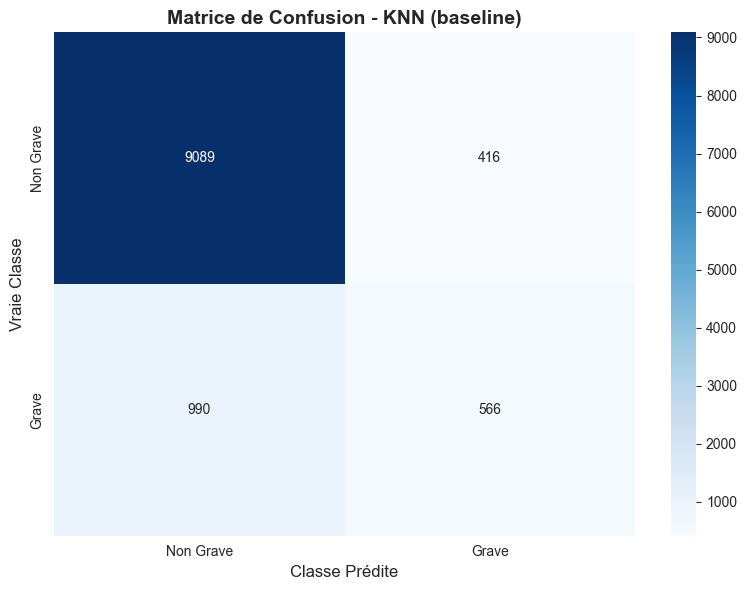


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.90      0.96      0.93      9505
       Grave       0.58      0.36      0.45      1556

    accuracy                           0.87     11061
   macro avg       0.74      0.66      0.69     11061
weighted avg       0.86      0.87      0.86     11061



In [48]:
# 1) K-Nearest Neighbors (baseline)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
knn_model, knn_res = fit_and_eval('KNN (baseline)', knn, X_train_model, X_test_model, y_train_model, y_test_model)



Entraînement du modèle: Logistic Regression (baseline)

MODÈLE: Logistic Regression (baseline)
Accuracy Train      : 0.8145
Accuracy Test       : 0.8137
Precision           : 0.4176
Recall              : 0.8226
F1-Score            : 0.5540
ROC-AUC             : 0.8786


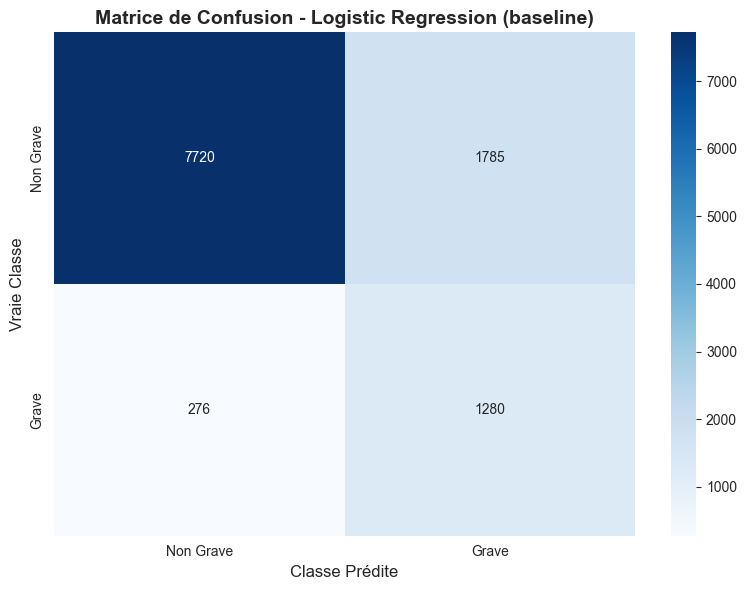


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.97      0.81      0.88      9505
       Grave       0.42      0.82      0.55      1556

    accuracy                           0.81     11061
   macro avg       0.69      0.82      0.72     11061
weighted avg       0.89      0.81      0.84     11061



In [49]:
# 2) Logistic Regression (regularized, class_weight to reduce bias)
logreg = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, class_weight='balanced', max_iter=1000, random_state=42)
logreg_model, logreg_res = fit_and_eval('Logistic Regression (baseline)', logreg, X_train_model, X_test_model, y_train_model, y_test_model)



Entraînement du modèle: Decision Tree (regularized)

MODÈLE: Decision Tree (regularized)
Accuracy Train      : 0.8482
Accuracy Test       : 0.8409
Precision           : 0.4621
Recall              : 0.8001
F1-Score            : 0.5859
ROC-AUC             : 0.8836


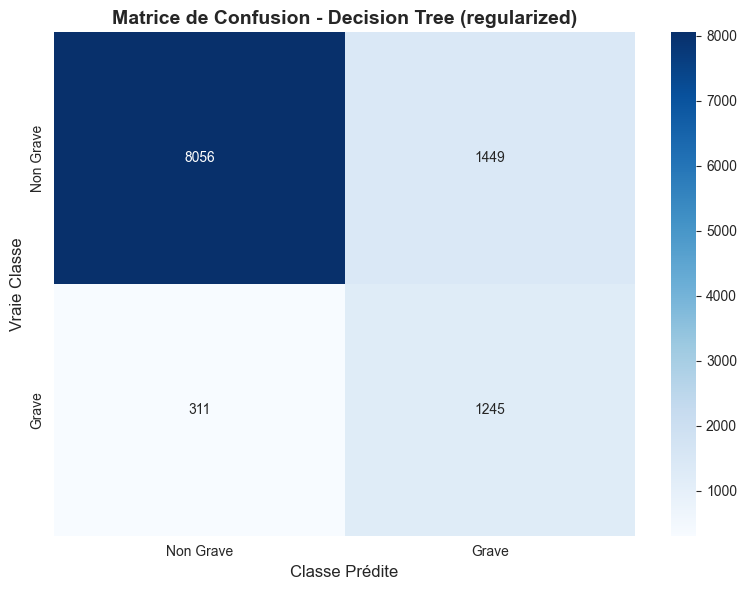


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.96      0.85      0.90      9505
       Grave       0.46      0.80      0.59      1556

    accuracy                           0.84     11061
   macro avg       0.71      0.82      0.74     11061
weighted avg       0.89      0.84      0.86     11061


Top features (Decision Tree):
nb_usagers         0.592073
agg                0.139842
col                0.090273
nb_vehicules       0.047951
dep                0.024092
catr               0.020832
situ               0.019913
presence_pieton    0.018901
v1                 0.013002
plan               0.010518
int                0.009144
vma                0.004836
vosp               0.003244
age_moyen          0.002191
lum                0.002139
circ               0.000492
mois               0.000474
atm                0.000061
surf               0.000021
prof               0.000000
dtype: float64


In [50]:
# 3) Decision Tree (regularized to avoid overfitting)
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=6, min_samples_leaf=20)
dt_model, dt_res = fit_and_eval('Decision Tree (regularized)', dt, X_train_model, X_test_model, y_train_model, y_test_model)

# Afficher importances si applicable
if hasattr(dt_model, 'feature_importances_'):
    importances = pd.Series(dt_model.feature_importances_, index=X_train_model.columns).sort_values(ascending=False).head(20)
    print('\nTop features (Decision Tree):')
    print(importances)



Entraînement du modèle: Random Forest (regularized)

MODÈLE: Random Forest (regularized)
Accuracy Train      : 0.8495
Accuracy Test       : 0.8442
Precision           : 0.4698
Recall              : 0.8355
F1-Score            : 0.6014
ROC-AUC             : 0.9068


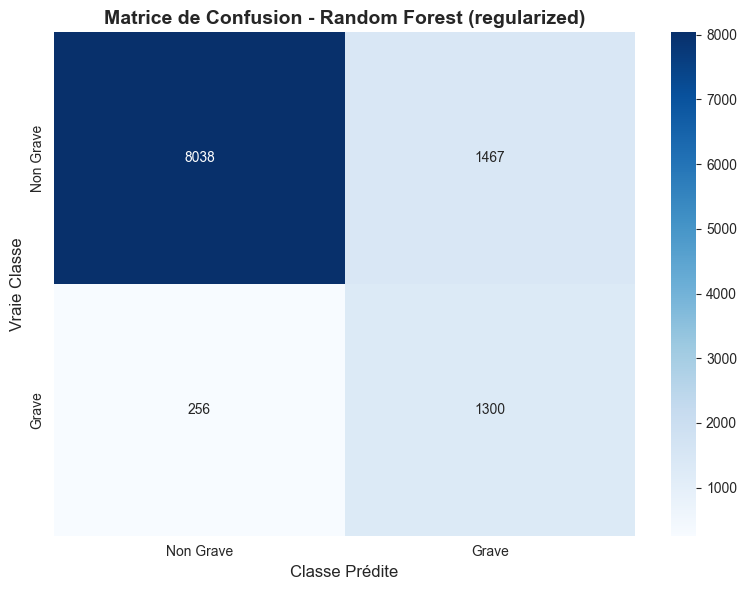


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.97      0.85      0.90      9505
       Grave       0.47      0.84      0.60      1556

    accuracy                           0.84     11061
   macro avg       0.72      0.84      0.75     11061
weighted avg       0.90      0.84      0.86     11061


Top features (Random Forest):
nb_usagers         0.243330
col                0.155740
nb_vehicules       0.127534
presence_pieton    0.089600
agg                0.068477
situ               0.067607
vma                0.060055
catr               0.034781
dep                0.032239
v1                 0.023704
int                0.018693
plan               0.016510
nbv                0.015064
age_moyen          0.011661
circ               0.011326
lum                0.005234
mois               0.004034
vosp               0.003497
larrout            0.003065
infra              0.002619
dtype: float64


In [51]:
# 4) Random Forest (regularized)
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', max_depth=8, min_samples_leaf=10, n_jobs=-1)
rf_model, rf_res = fit_and_eval('Random Forest (regularized)', rf, X_train_model, X_test_model, y_train_model, y_test_model)

if hasattr(rf_model, 'feature_importances_'):
    imp_rf = pd.Series(rf_model.feature_importances_, index=X_train_model.columns).sort_values(ascending=False).head(20)
    print('\nTop features (Random Forest):')
    print(imp_rf)



Using XGBoost. Fitting (no early stopping to keep compatibility with installed xgboost version)...

MODÈLE: XGBoost (no early stopping)
Accuracy Train      : 0.9178
Accuracy Test       : 0.8980
Precision           : 0.6890
Recall              : 0.5013
F1-Score            : 0.5804
ROC-AUC             : 0.9101


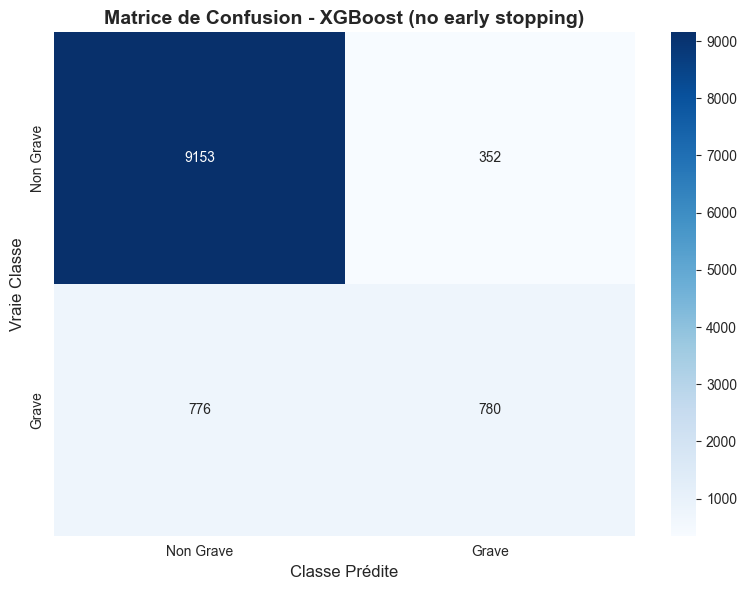


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.92      0.96      0.94      9505
       Grave       0.69      0.50      0.58      1556

    accuracy                           0.90     11061
   macro avg       0.81      0.73      0.76     11061
weighted avg       0.89      0.90      0.89     11061



In [52]:
# 5) XGBoost (required)
# Using XGBoost without callback-based early stopping to ensure compatibility across xgboost versions installed
xgb_clf = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.05, use_label_encoder=False, random_state=42, verbosity=0, n_jobs=-1)
print('\nUsing XGBoost. Fitting (no early stopping to keep compatibility with installed xgboost version)...')
xgb_model = xgb_clf
xgb_model.fit(X_train_model, y_train_model)

xgb_results = evaluate_model('XGBoost (no early stopping)', xgb_model, X_train_model, X_test_model, y_train_model, y_test_model)


In [53]:
# Résumé des résultats
results_list = [knn_res, logreg_res, dt_res, rf_res, xgb_results]
results_df = pd.DataFrame(results_list).set_index('Modèle')
print('\n' + '='*100)
print('RÉSUMÉ COMPARATIF DES MODÈLES')
print('='*100)
print(results_df)



RÉSUMÉ COMPARATIF DES MODÈLES
                                Accuracy Train  Accuracy Test  Precision  \
Modèle                                                                     
KNN (baseline)                        1.000000       0.872887   0.576375   
Logistic Regression (baseline)        0.814493       0.813670   0.417618   
Decision Tree (regularized)           0.848195       0.840882   0.462138   
Random Forest (regularized)           0.849461       0.844227   0.469823   
XGBoost (no early stopping)           0.917814       0.898020   0.689046   

                                  Recall  F1-Score   ROC-AUC  
Modèle                                                        
KNN (baseline)                  0.363753  0.446020  0.796206  
Logistic Regression (baseline)  0.822622  0.553993  0.878558  
Decision Tree (regularized)     0.800129  0.585882  0.883580  
Random Forest (regularized)     0.835476  0.601434  0.906769  
XGBoost (no early stopping)     0.501285  0.580357  0.9100

In [54]:
# Comparison of baseline models + Overfitting diagnostic and notices
import pandas as pd
import numpy as np

print('\n' + '='*120)
print('COMPARAISON DES MODÈLES BASELINES ET DIAGNOSTIQUE D\'SUR-ENTRAÎNEMENT')
print('='*120)

# Build a summary DataFrame from available results
summary = None
if 'final_results' in globals():
    fr = globals().get('final_results')
    if fr is not None:
        try:
            summary = pd.DataFrame(fr).set_index('Modèle')
            print('\nUsing cross-validated summary from `final_results` (train/val metrics available).')
        except Exception:
            summary = None

# fallback: use results_df if present
if summary is None and 'results_df' in globals():
    try:
        tmp = globals()['results_df']
        # if it's already a DataFrame with index 'Modèle' or model names
        summary = tmp.copy()
        print('\nUsing `results_df` from notebook (may contain final test metrics).')
    except Exception:
        summary = None

# fallback: collect individual res dicts (knn_res, logreg_res, dt_res, rf_res, xgb_results)
if summary is None:
    rows = []
    for name in ('knn_res', 'logreg_res', 'dt_res', 'rf_res', 'xgb_results'):
        if name in globals() and globals()[name] is not None:
            r = globals()[name].copy()
            # ensure it's a dict-like
            try:
                rows.append(r)
            except Exception:
                pass
    if rows:
        summary = pd.DataFrame(rows).set_index('Modèle')
        print('\nBuilt summary from individual model result dicts.')

if summary is None:
    print('\nNo results found to compare. Please run the model training cells first.')
else:
    # Normalize column names (lowercase, replace spaces)
    summary.columns = [c.strip() for c in summary.columns]

    display_cols = list(summary.columns)
    print('\nSummary table (available metrics):')
    display(summary.round(4))

    # Detect overfitting:
    # Prefer CV columns if present
    overfit_info = []
    for model_name in summary.index:
        row = summary.loc[model_name]
        train_acc = None
        val_acc = None
        test_acc = None

        # possible column names
        if 'Train_Acc_CV_mean' in row.index:
            train_acc = row.get('Train_Acc_CV_mean')
        if 'Val_Acc_CV_mean' in row.index:
            val_acc = row.get('Val_Acc_CV_mean')
        # older keys
        if 'Accuracy Train' in row.index:
            train_acc = row.get('Accuracy Train')
        if 'Accuracy Test' in row.index:
            test_acc = row.get('Accuracy Test')
        if 'Test_Accuracy' in row.index:
            test_acc = row.get('Test_Accuracy')

        # Compute gaps
        gap_train_val = None
        gap_train_test = None
        if train_acc is not None and val_acc is not None and not pd.isna(train_acc) and not pd.isna(val_acc):
            gap_train_val = float(train_acc) - float(val_acc)
        if train_acc is not None and test_acc is not None and not pd.isna(train_acc) and not pd.isna(test_acc):
            gap_train_test = float(train_acc) - float(test_acc)

        # Decide threshold
        overfit_flag = False
        severity = None
        reasons = []
        if gap_train_val is not None:
            if gap_train_val > 0.10:
                overfit_flag = True
                severity = 'HIGH'
                reasons.append(f'Train vs Val gap = {gap_train_val:.3f} (>0.10)')
            elif gap_train_val > 0.05:
                overfit_flag = True
                severity = 'MODERATE'
                reasons.append(f'Train vs Val gap = {gap_train_val:.3f} (>0.05)')
        elif gap_train_test is not None:
            if gap_train_test > 0.10:
                overfit_flag = True
                severity = 'HIGH'
                reasons.append(f'Train vs Test gap = {gap_train_test:.3f} (>0.10)')
            elif gap_train_test > 0.05:
                overfit_flag = True
                severity = 'MODERATE'
                reasons.append(f'Train vs Test gap = {gap_train_test:.3f} (>0.05)')

        # Perfect train accuracy warning
        if train_acc is not None and float(train_acc) > 0.999:
            reasons.append('Perfect (≈100%) train accuracy — likely data leakage or target present in features')
            if severity is None:
                severity = 'CRITICAL'
            overfit_flag = True

        overfit_info.append({
            'Model': model_name,
            'TrainAcc': train_acc,
            'ValAcc': val_acc,
            'TestAcc': test_acc,
            'Overfit': overfit_flag,
            'Severity': severity,
            'Reasons': '; '.join(reasons) if reasons else ''
        })

    of_df = pd.DataFrame(overfit_info).set_index('Model')

    print('\nOverfitting diagnostics:')
    display(of_df)

    # Quick leakage checks
    print('\nQuick data-leakage and suspicious-features checks:')
    leakage_warnings = []
    if 'X_train_model' in globals() and 'y_train_model' in globals():
        Xchk = globals()['X_train_model']
        ychk = globals()['y_train_model']
        # numeric corr
        num_cols = Xchk.select_dtypes(include=[np.number]).columns.tolist()
        if len(num_cols) > 0:
            corrs = Xchk[num_cols].corrwith(ychk)
            top_corr = corrs.abs().sort_values(ascending=False).head(10)
            print('\nTop correlations (abs) with target:')
            print(top_corr.round(4).to_string())
            high_corr = top_corr[top_corr > 0.9]
            if len(high_corr) > 0:
                leakage_warnings.append(f'Features with very high correlation (>0.9) with target: {list(high_corr.index)}')

        # identical columns
        identical = []
        for col in Xchk.columns:
            try:
                # compare values ignoring index if shapes match
                if Xchk[col].shape[0] == ychk.shape[0] and Xchk[col].equals(ychk):
                    identical.append(col)
            except Exception:
                continue
        if identical:
            leakage_warnings.append(f'Columns identical to target: {identical}')

        # duplicates between train/test indices (if indices are preserved)
        if 'X_test_model' in globals():
            inter_idx = set(Xchk.index).intersection(set(globals()['X_test_model'].index))
            if inter_idx:
                leakage_warnings.append(f'{len(inter_idx)} overlapping sample indices found between train and test (possible leakage)')

    else:
        print('No X_train_model/y_train_model available for leakage checks. Run preprocessing/training cells first.')

    if leakage_warnings:
        print('\nLEAKAGE WARNINGS:')
        for w in leakage_warnings:
            print(' -', w)
    else:
        print('\nNo obvious leakage detected by quick checks (no identical columns or corr>0.9 found).')

    # Per-model remediation suggestions
    print('\nPer-model notices and suggested fixes:')
    for model_name, row in of_df.iterrows():
        print('\n' + '-'*80)
        print(f'Model: {model_name}')
        if not row['Overfit']:
            print('  • No strong overfitting detected by the simple gap checks.')
            print('    Suggestions: standard CV, small grid search for regularization, and check data leakage if results look too good.')
            continue

        print(f"  • Overfitting detected (severity={row['Severity']}): {row['Reasons']}")
        # Tailored suggestions
        lname = str(model_name).lower()
        if 'decision' in lname or 'tree' in lname:
            print('  • Likely cause: tree-based model (high depth / low min_samples_leaf) or noisy features.')
            print('    Fixes: reduce max_depth, increase min_samples_leaf, prune features, or use RandomForest with limited depth / max_features.')
        elif 'random' in lname or 'forest' in lname:
            print('  • Likely cause: forest too deep or insufficient regularization (or data leakage).')
            print('    Fixes: reduce max_depth, increase min_samples_leaf, set max_features="sqrt" (already used), limit n_estimators or use out-of-bag estimates.')
        elif 'xgboost' in lname or 'xgb' in lname:
            print('  • Likely cause: gradient boosting overfitting (too many trees / too high depth / low regularization).')
            print('    Fixes: lower max_depth, increase reg_alpha/reg_lambda, use subsample/colsample_bytree < 1, enable early stopping (upgrade xgboost if needed).')
        elif 'logistic' in lname or 'logit' in lname:
            print('  • Likely cause: under-regularized linear model or leak/linearly separable data.')
            print('    Fixes: increase regularization (lower C), try penalty="l1" or ElasticNet, or reduce features.')
        elif 'knn' in lname:
            print('  • Likely cause: K too small, or dataset contains near-duplicates making neighbors trivial.')
            print('    Fixes: increase n_neighbors, ensure features are scaled, remove near-duplicates, or use distance-weighting (already used).')
        else:
            print('  • Generic fixes: run Stratified CV, add regularization, reduce model complexity, perform feature selection, and check for data leakage.')

    print('\n' + '='*120)

# End of diagnostics cell


COMPARAISON DES MODÈLES BASELINES ET DIAGNOSTIQUE D'SUR-ENTRAÎNEMENT

Using `results_df` from notebook (may contain final test metrics).

Summary table (available metrics):


,Accuracy Train,Accuracy Test,Precision,Recall,F1-Score,ROC-AUC
Modèle,,,,,,
KNN (baseline),1.0000,0.8729,0.5764,0.3638,0.4460,0.7962
Logistic Regression (baseline),0.8145,0.8137,0.4176,0.8226,0.5540,0.8786
Decision Tree (regularized),0.8482,0.8409,0.4621,0.8001,0.5859,0.8836
Random Forest (regularized),0.8495,0.8442,0.4698,0.8355,0.6014,0.9068
XGBoost (no early stopping),0.9178,0.8980,0.6890,0.5013,0.5804,0.9101



Overfitting diagnostics:


,TrainAcc,ValAcc,TestAcc,Overfit,Severity,Reasons
Model,,,,,,
KNN (baseline),1.000000,None,0.872887,True,HIGH,Train vs Test gap = 0.127 (>0.10); Perfect (≈1...
Logistic Regression (baseline),0.814493,None,0.813670,False,None,
Decision Tree (regularized),0.848195,None,0.840882,False,None,
Random Forest (regularized),0.849461,None,0.844227,False,None,
XGBoost (no early stopping),0.917814,None,0.898020,False,None,



Quick data-leakage and suspicious-features checks:

Top correlations (abs) with target:
nb_vehicules       0.2827
agg                0.2588
col                0.2564
nb_usagers         0.2149
v1                 0.2105
situ               0.2043
plan               0.1871
vma                0.1672
presence_pieton    0.1520
int                0.1022

No obvious leakage detected by quick checks (no identical columns or corr>0.9 found).

Per-model notices and suggested fixes:

--------------------------------------------------------------------------------
Model: KNN (baseline)
  • Overfitting detected (severity=HIGH): Train vs Test gap = 0.127 (>0.10); Perfect (≈100%) train accuracy — likely data leakage or target present in features
  • Likely cause: K too small, or dataset contains near-duplicates making neighbors trivial.
    Fixes: increase n_neighbors, ensure features are scaled, remove near-duplicates, or use distance-weighting (already used).

---------------------------------------

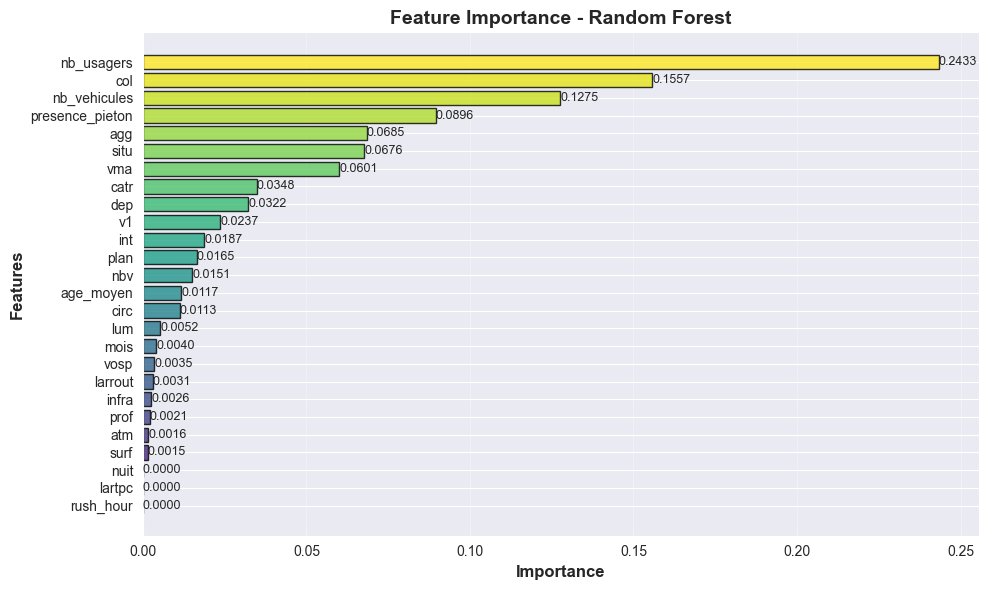


Top 5 Features les plus importantes:
        Feature  Importance
            agg    0.068477
presence_pieton    0.089600
   nb_vehicules    0.127534
            col    0.155740
     nb_usagers    0.243330


In [55]:
# Feature Importance (Random Forest)
# This cell computes and visualizes feature importances from the trained Random Forest model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Try to locate the trained Random Forest model object
rf_candidate = None
for name in ('rf_model', 'rf', 'fitted_model'):
    if name in globals():
        obj = globals()[name]
        # heuristics: check for feature_importances_
        if hasattr(obj, 'feature_importances_'):
            rf_candidate = obj
            break

if rf_candidate is None:
    print('No RandomForest model with `feature_importances_` found in the notebook globals.\nPlease ensure a RandomForestClassifier has been trained and is available as `rf_model` or `rf`.')
else:
    # Determine feature names (prefer the processed train set)
    if 'X_train_model' in globals():
        feature_names = list(globals()['X_train_model'].columns)
    elif 'X_train_proc' in globals():
        feature_names = list(globals()['X_train_proc'].columns)
    elif 'X_train' in globals():
        feature_names = list(globals()['X_train'].columns)
    elif 'X' in globals():
        feature_names = list(globals()['X'].columns)
    else:
        feature_names = None

    importances = np.array(rf_candidate.feature_importances_)

    if feature_names is None:
        print('Could not determine feature names; showing importances with index positions.')
        feature_names = [f'X{i}' for i in range(len(importances))]

    if len(importances) != len(feature_names):
        print(f"Length mismatch: model has {len(importances)} importances but there are {len(feature_names)} feature names.")
        # try to align by using only the min length
        L = min(len(importances), len(feature_names))
        importances = importances[:L]
        feature_names = feature_names[:L]

    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=True)

    # Visualisation avec barres horizontales
    plt.figure(figsize=(10, max(6, int(0.25 * len(feature_importance)))))
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(feature_importance)))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'],
             color=colors, edgecolor='black', alpha=0.8)
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Features', fontsize=12, fontweight='bold')
    plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

    # Add values to bars
    for i, v in enumerate(feature_importance['Importance']):
        plt.text(v + 1e-6, i, f'{v:.4f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    print('\nTop 5 Features les plus importantes:')
    print(feature_importance.tail(5).to_string(index=False))


Using selected features for tuning: X_train_fs
Using selected features for testing: X_test_fs

FINE-TUNING: KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.3s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.5s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.8s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.7s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.6s
[CV] END ........

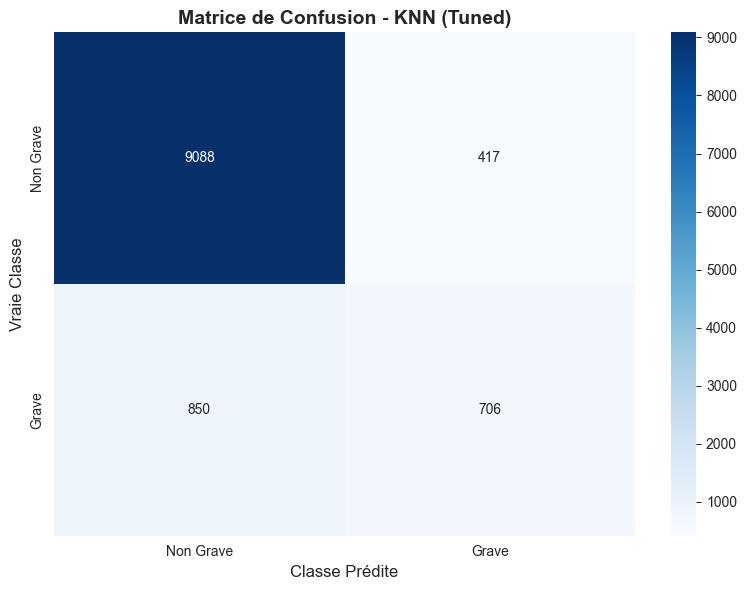


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.91      0.96      0.93      9505
       Grave       0.63      0.45      0.53      1556

    accuracy                           0.89     11061
   macro avg       0.77      0.70      0.73     11061
weighted avg       0.87      0.89      0.88     11061


FINE-TUNING: Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; tot

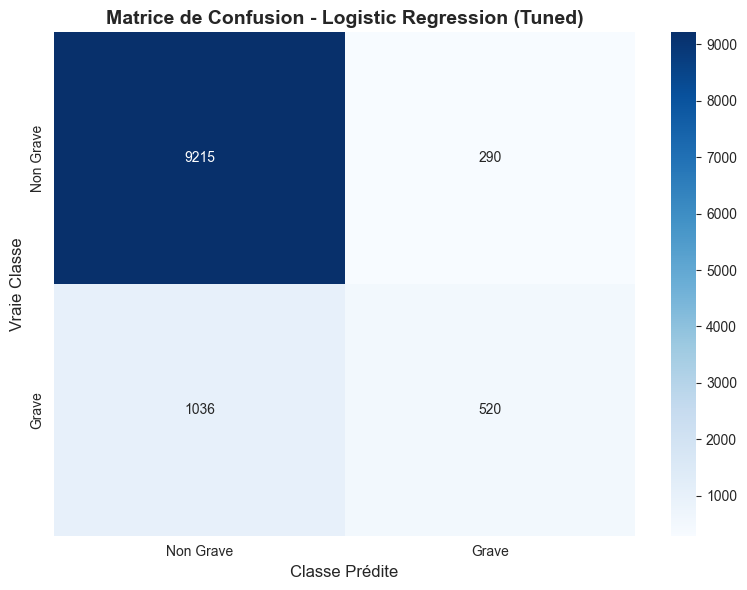


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.90      0.97      0.93      9505
       Grave       0.64      0.33      0.44      1556

    accuracy                           0.88     11061
   macro avg       0.77      0.65      0.69     11061
weighted avg       0.86      0.88      0.86     11061


FINE-TUNING: Decision Tree
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, 

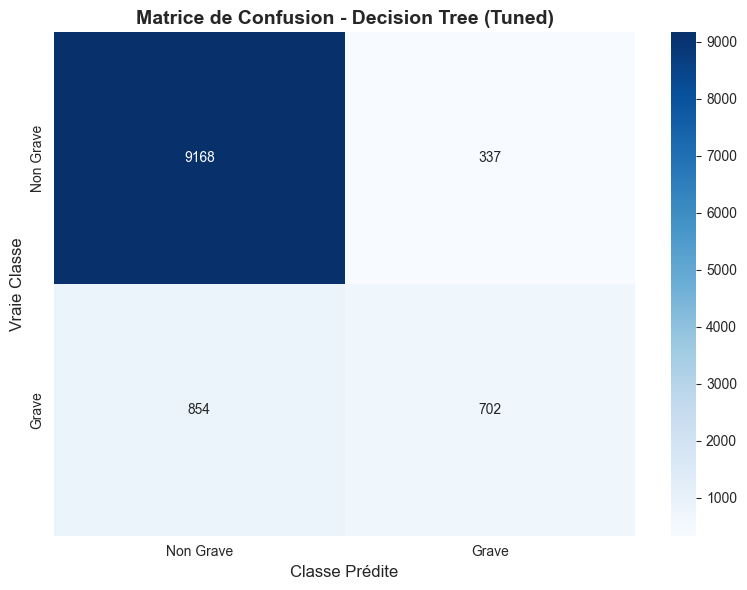


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.91      0.96      0.94      9505
       Grave       0.68      0.45      0.54      1556

    accuracy                           0.89     11061
   macro avg       0.80      0.71      0.74     11061
weighted avg       0.88      0.89      0.88     11061


FINE-TUNING: Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_s

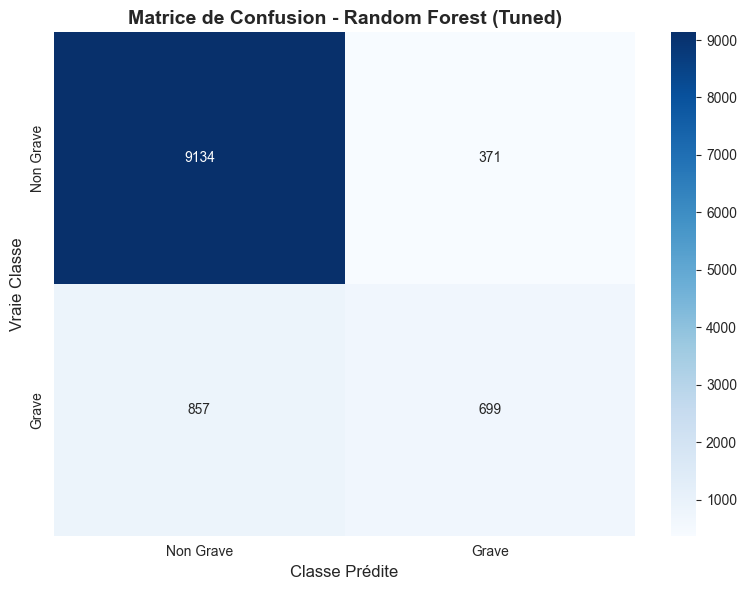


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.91      0.96      0.94      9505
       Grave       0.65      0.45      0.53      1556

    accuracy                           0.89     11061
   macro avg       0.78      0.71      0.73     11061
weighted avg       0.88      0.89      0.88     11061


FINE-TUNING: XGBoost
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; 

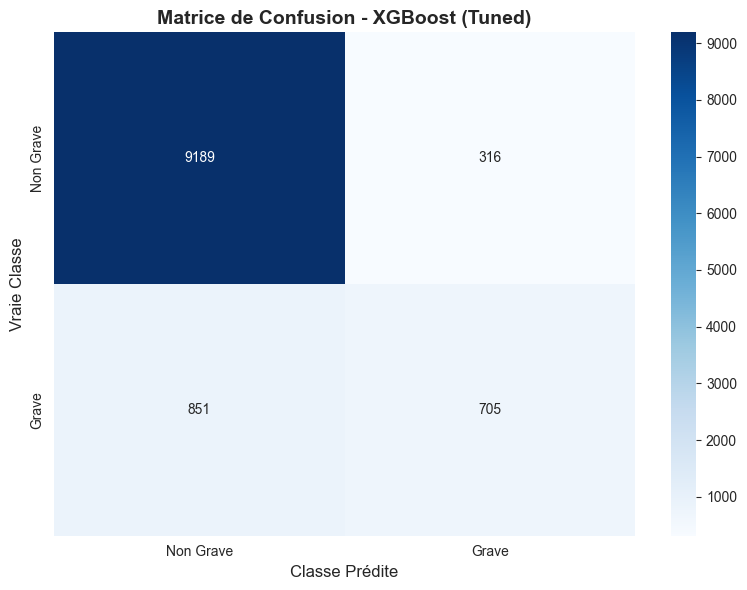


Rapport de classification:
              precision    recall  f1-score   support

   Non Grave       0.92      0.97      0.94      9505
       Grave       0.69      0.45      0.55      1556

    accuracy                           0.89     11061
   macro avg       0.80      0.71      0.74     11061
weighted avg       0.88      0.89      0.88     11061


TUNED MODELS SUMMARY (trained on selected features if available)

Model: KNN
  CV F1: 0.5616013740068292
  Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
  Test Accuracy: 0.8854533948105958
  Test F1: 0.5270623366927958

Model: Logistic Regression
  CV F1: 0.45386339769518225
  Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
  Test Accuracy: 0.8801193382153513
  Test F1: 0.43956043956043955

Model: Decision Tree
  CV F1: 0.5598639394931298
  Best Params: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
  Test Accuracy: 0.892324382967182
  Test F1: 0.5410404624277456

Model: Random Forest
  CV F

In [56]:
# Hyperparameter tuning (GridSearchCV) for selected models — extended to all baseline models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Defensive checks: ensure training data exists
if 'X_train_model' not in globals() or 'y_train_model' not in globals():
    raise RuntimeError('X_train_model and y_train_model must be available. Run preprocessing/training cells first.')

# Prefer to run tuning/evaluation on selected features if available
if 'X_train_fs' in globals() and globals().get('X_train_fs') is not None:
    X_tr = globals()['X_train_fs']
    print('Using selected features for tuning: X_train_fs')
    if 'X_test_fs' in globals() and globals().get('X_test_fs') is not None:
        X_te = globals()['X_test_fs']
        print('Using selected features for testing: X_test_fs')
    else:
        # fallback to X_test_model but with feature subsetting if possible
        X_te_full = globals().get('X_test_model')
        if X_te_full is not None:
            common = [c for c in X_tr.columns if c in X_te_full.columns]
            X_te = X_te_full[common]
            print('Using X_test_model subsetted to selected features')
else:
    # existing fallback behavior
    X_tr = globals().get('X_train_model')
    X_te = globals().get('X_test_model')

Y_tr = globals()['y_train_model']
Y_te = globals().get('y_test_model', None)

# If test set not available, we'll still do CV but skip final evaluation
if X_te is None or Y_te is None:
    print('Warning: X_test or y_test not found for final evaluation — grid search will run but final test evaluation may be skipped.')

# Define parameter grids (kept compact to limit runtime)
models_to_tune = {
    'KNN': {
        'model': KNeighborsClassifier(n_jobs=-1),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 = manhattan, 2 = euclidean
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, verbosity=0, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

# Run GridSearchCV for each model and store best estimators
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_models = {}
tuned_results = []

for model_name, cfg in models_to_tune.items():
    print('\n' + '='*80)
    print(f'FINE-TUNING: {model_name}')
    print('='*80)

    grid_search = GridSearchCV(
        estimator=cfg['model'],
        param_grid=cfg['params'],
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=2
    )

    try:
        grid_search.fit(X_tr, Y_tr)
    except Exception as e:
        print(f'Grid search failed for {model_name}: {e}')
        continue

    print('\nMeilleurs paramètres trouvés:')
    for param, value in grid_search.best_params_.items():
        print(f'  {param}: {value}')

    print(f"\nMeilleur score (F1) en validation croisée: {grid_search.best_score_:.4f}")

    best = grid_search.best_estimator_
    tuned_models[model_name] = best

    # Evaluate on train and test (if available)
    try:
        res = evaluate_model(f'{model_name} (Tuned)', best, X_tr, X_te if X_te is not None else X_tr, Y_tr, Y_te if Y_te is not None else Y_tr)
    except Exception as e:
        print(f'Error during evaluation of {model_name}: {e}')
        res = None

    tuned_results.append({'Modèle': model_name, 'BestParams': grid_search.best_params_, 'CV_F1': grid_search.best_score_, 'Eval': res})

# Expose tuned models and results to notebook globals
globals().update({'tuned_models': tuned_models, 'tuned_results': tuned_results})

# Summarize tuned results concisely
print('\n' + '='*80)
print('TUNED MODELS SUMMARY (trained on selected features if available)')
print('='*80)
for r in tuned_results:
    print('\nModel:', r['Modèle'])
    print('  CV F1:', r['CV_F1'])
    print('  Best Params:', r['BestParams'])
    if r['Eval'] is not None:
        print('  Test Accuracy:', r['Eval'].get('Accuracy Test'))
        print('  Test F1:', r['Eval'].get('F1-Score'))
    else:
        print('  No final evaluation available for this model.')


# Résultats finaux

In [57]:
# ================================
# RÉSULTATS FINAUX: VALIDATION CROISÉE ET TEST
# ================================

import pandas as pd
from sklearn.model_selection import cross_val_score

# Collecte des résultats
final_results = []

# Fonction pour évaluer et collecter les résultats d'un modèle
def evaluate_model_final(model_name, model, X, y):
    """Évalue un modèle donné sur les données fournies et collecte les résultats."""
    try:
        # Validation croisée (5 plis par défaut)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1', n_jobs=-1)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

        # Ajustement sur l'ensemble complet
        model.fit(X, y)

        # Prédictions sur l'ensemble d'entraînement (pour rapport)
        y_pred = model.predict(X)

        # Collecte des résultats
        # compute train accuracy robustly
        train_acc_val = float(np.sum(np.asarray(y == y_pred)) / len(y))
        result = {
            'Modèle': model_name,
            'CV_F1_Mean': cv_mean,
            'CV_F1_Std': cv_std,
            'Train_Acc': train_acc_val
        }
        final_results.append(result)

        print(f"Modèle: {model_name} | CV F1: {cv_mean:.4f} ± {cv_std:.4f} | Train Acc: {result['Train_Acc']:.4f}")

    except Exception as e:
        print(f"Erreur lors de l'évaluation du modèle {model_name}: {e}")

# Modèles à évaluer (tous les modèles ajustés précédemment)
models_to_evaluate = {**tuned_models}

# Évaluation de chaque modèle
for name, model in models_to_evaluate.items():
    evaluate_model_final(name, model, X_train_fs, y_train_model)

# Résultats finaux
results_df_final = pd.DataFrame(final_results).set_index('Modèle')
print("\n" + "="*100)
print("RÉSULTATS FINAUX")
print("="*100)
print(results_df_final)


Modèle: KNN | CV F1: 0.5592 ± 0.0085 | Train Acc: 0.9014
Modèle: Logistic Regression | CV F1: 0.4509 ± 0.0094 | Train Acc: 0.8823
Modèle: Decision Tree | CV F1: 0.5602 ± 0.0144 | Train Acc: 0.9020
Modèle: Random Forest | CV F1: 0.5608 ± 0.0130 | Train Acc: 0.9110
Modèle: XGBoost | CV F1: 0.5646 ± 0.0082 | Train Acc: 0.9026

RÉSULTATS FINAUX
                     CV_F1_Mean  CV_F1_Std  Train_Acc
Modèle                                               
KNN                    0.559195   0.008513   0.901381
Logistic Regression    0.450886   0.009413   0.882304
Decision Tree          0.560179   0.014441   0.901969
Random Forest          0.560778   0.012983   0.911010
XGBoost                0.564557   0.008157   0.902579


# Interprétabilité des modèles

In [58]:
# Pour les modèles interprétables (comme la régression logistique et les arbres de décision), nous pouvons examiner les coefficients ou les importances des caractéristiques.
# Pour les modèles non interprétables (comme les forêts aléatoires et les XGBoost), nous pouvons utiliser des techniques comme SHAP ou LIME pour expliquer les prédictions.

# Exemple: importances des caractéristiques pour le modèle XGBoost
try:
    import shap
    # Explainer SHAP pour le modèle XGBoost
    explainer = shap.Explainer(tuned_models['XGBoost'].predict, X_train_fs)
    shap_values = explainer(X_train_fs)
    # Sommaire des valeurs SHAP
    shap.summary_plot(shap_values, X_train_fs, plot_type="bar")
except ImportError:
    print('shap not installed; skipping SHAP-based interpretability.')
except Exception as e:
    print(f"Erreur lors de l'interprétation du modèle: {e}")

# Fin du notebook


shap not installed; skipping SHAP-based interpretability.
